## Reset Previous Work

In [1]:
pth = "/bigstore/GeneralStorage/fangming/projects/test_merfish/data"

In [2]:
from MERFISH_Objects.execute_class import *
from fish_helpers import colorize_segmented_image
import shutil

2022-08-22 15:13:00,775 [INFO] WRITING LOG OUTPUT TO /home/fangming/.cellpose/run.log


In [3]:
import importlib
# importlib.reload(MERFISH_Objects.execute_class)

In [4]:
cword_config = 'merfish_config_zebrafinch'
config = importlib.import_module(cword_config)

In [5]:
metadata_path = '/bigstore/Images2022/Gaby/Zebrafinch/Zebra_B0_2022Jul11/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
cword_config = 'merfish_config_zebrafinch'
config = importlib.import_module(cword_config)
parameters = config.parameters
fishdata_path = os.path.join(metadata_path, parameters['fishdata'])
utilities_path = parameters['utilities_path']

In [6]:
for key in parameters:
    if key.endswith('path') or key.endswith('data'):
        print(key, parameters[key])

daemon_path /scratch/test_daemon_FX
utilities_path /scratch/test_merfish_FX
fishdata fishdata_testFX


In [7]:
import time
from tqdm import trange
import pandas as pd
from collections import Counter
import numpy as np
from Bio import SeqIO

In [8]:
from MERFISH_Objects.execute_class import *
metadata_path = '/bigstore/Images2022/Gaby/Zebrafinch/Zebra_B0_2022Jul11/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
cword_config = 'merfish_config_zebrafinch'
config = importlib.import_module(cword_config)
bitmap = config.bitmap
parameters = config.parameters

In [9]:
posname = '7-Pos004_003'#image_metadata.posnames[0]

# Process Single Position

In [10]:
%%time
self = Dataset_Class(metadata_path, dataset, cword_config, verbose=True)
self.main()

15:13:00 Checking Imaging: 0it [00:00, ?it/s]
15:13:01 Checking Hot Pixel: 0it [00:00, ?it/s]
15:13:01 Checking Position Flags: 100%|██████████| 150/150 [00:00<00:00, 1433.56it/s]

CPU times: user 128 ms, sys: 23.6 ms, total: 151 ms
Wall time: 209 ms


### Segmentation

In [13]:
%%time
self = Segment_Class(metadata_path,dataset,posname,cword_config,verbose=True)
self.main()

Checking Projection Zindexes: 0it [00:00, ?it/s]
15:13:12 Loading Transformation: 0it [00:00, ?it/s]
Generating Nuclear Stack: 100%|██████████| 38/38 [00:31<00:00,  1.20it/s]
Initialize Cellpose: 0it [00:00, ?it/s]

2022-08-22 15:13:47,015 [INFO] TORCH CUDA version not installed/working.
2022-08-22 15:13:47,016 [INFO] >>>> using CPU



Segmenting Nuclei Images:   0%|          | 0/1 [00:00<?, ?it/s]

2022-08-22 15:13:48,416 [WARNING] cellprob_threshold and dist_threshold are being deprecated in a future release, use mask_threshold instead
2022-08-22 15:13:48,417 [INFO] ~~~ FINDING MASKS ~~~
2022-08-22 15:13:54,085 [INFO] >>>> TOTAL TIME 5.67 sec


Filter Labels: 100%|██████████| 262/262 [00:01<00:00, 160.34it/s]
Voronoi Segment: 0it [00:00, ?it/s]
Saving Masks: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]


CPU times: user 2min 26s, sys: 33.7 s, total: 3min
Wall time: 55 s


##### Visual Check

In [14]:
mat = self.nuclear_stack
mask = self.mask_stack[:,:,0]
mat.shape, mask.shape

((2048, 2448), (2048, 2448))

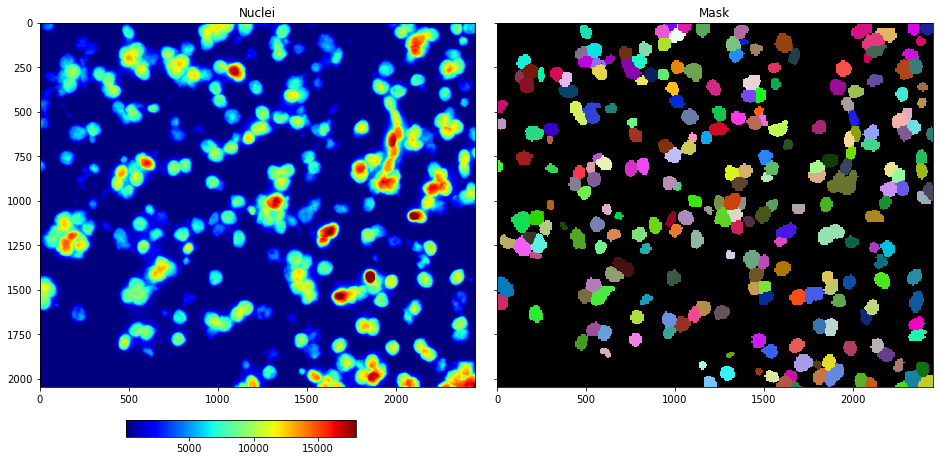

In [15]:
# mat and mask

fig, axs = plt.subplots(1, 2, figsize=[8*2,8], sharex=True, sharey=True)
cax = fig.add_axes([0.2, 0.1, 0.2, 0.03])
ax = axs[0]
ax.set_title('Nuclei')
vmin, vmax = np.percentile(mat.ravel(),[50,99.9])
g = ax.imshow(mat, vmin=vmin, vmax=vmax, cmap='jet')
fig.colorbar(g, shrink=0.5, cax=cax, orientation='horizontal')

ax = axs[1]
ax.set_title('Mask')
ax.imshow(colorize_segmented_image(mask), interpolation='nearest')

fig.subplots_adjust(wspace=0.05)
plt.show()


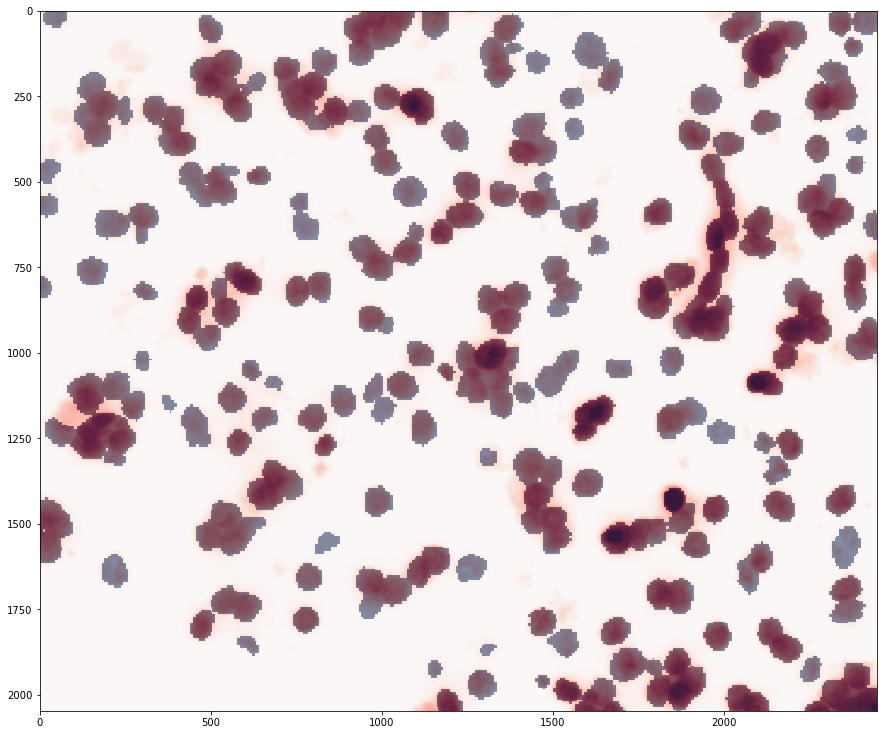

In [16]:
fig, ax = plt.subplots(1, 1, figsize=[15,15]) #, sharex=True, sharey=True)
vmin, vmax = np.percentile(mat.ravel(),[50,99.9])
g = ax.imshow(mat, vmin=vmin, vmax=vmax, cmap='Reds', alpha=1)
ax.imshow((mask>0).astype(int), interpolation='nearest', cmap='Blues', alpha=0.5)
# fig.colorbar(g, shrink=0.3)
plt.show()